In [1]:
import csv
import numpy as np

with open("train.csv") as trainFile:
    train = list(csv.reader(trainFile))
    label = [train[i][0] for i in range(1, len(train))]
    image = [np.array(train[i][1:], dtype=float) / 255 for i in range(1, len(train))]

print(len(image[0]))

784


1


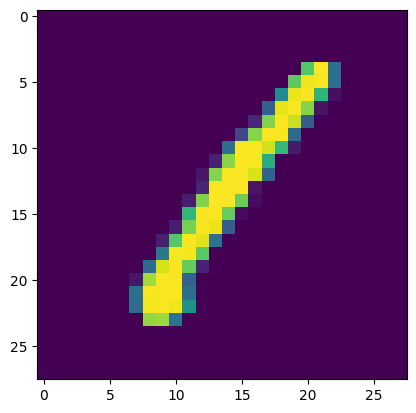

In [2]:
import matplotlib.pyplot as plt
plt.imshow(image[0].reshape(28, 28))
print(label[0])

In [3]:
inputLayerSize = 784
hiddenLayer1Size = 20
hiddenLayer2Size = 20
outputLayerSize = 10
W12 = np.random.rand(hiddenLayer1Size, inputLayerSize) * 2 - 1
W23 = np.random.rand(hiddenLayer2Size, hiddenLayer1Size) * 2 - 1
W34 = np.random.rand(outputLayerSize, hiddenLayer2Size) * 2 - 1
bias12 = np.random.rand(hiddenLayer1Size) * 2 - 1
bias23 = np.random.rand(hiddenLayer2Size) * 2 - 1
bias34 = np.random.rand(outputLayerSize) * 2 - 1

# can edit
def activation(x):
    return 1 / (1 + np.exp(-x))

# can edit
def activation_(x):
    return activation(x) * (1 - activation(x))

def predict(input):
    hidden1Before = np.dot(W12, input) + bias12
    hidden1After = activation(hidden1Before)
    hidden2Before = np.dot(W23, hidden1After) + bias23
    hidden2After = activation(hidden2Before)
    outputBefore = np.dot(W34, hidden2After) + bias34
    outputAfter = activation(outputBefore)
    return (input, (hidden1Before, hidden1After), (hidden2Before, hidden2After), (outputBefore, outputAfter))

print("prediction to image #0 is: ", predict(image[0])[3][1])

def onehot(value):
    return np.eye(10)[int(value)]

# can edit
def error(answer, expected):
    return np.sum((answer - expected) ** 2)

# can edit
def error_(answer, expected):
    return 2 * (answer - expected)

print("error is: ", error(predict(image[0])[3][1], onehot(label[0])))
print("derivative of error with respect to answer is: ", error_(predict(image[0])[3][1], onehot(label[0])))

prediction to image #0 is:  [0.09536249 0.98872697 0.4884658  0.56368946 0.51864588 0.43831099
 0.50280407 0.21730168 0.67943064 0.95141979]
error is:  2.6935333830582087
derivative of error with respect to answer is:  [ 0.19072498 -0.02254606  0.9769316   1.12737893  1.03729177  0.87662199
  1.00560813  0.43460337  1.35886127  1.90283959]


prediction before:  [0.10668122 0.99305146 0.48057549 0.7911173  0.30934922 0.27604739
 0.33523691 0.12940359 0.5386133  0.86231514]
prediction after:  [0.10698498 0.99303035 0.47370365 0.78697476 0.30502619 0.27512802
 0.33156211 0.12901376 0.52907761 0.85897047]


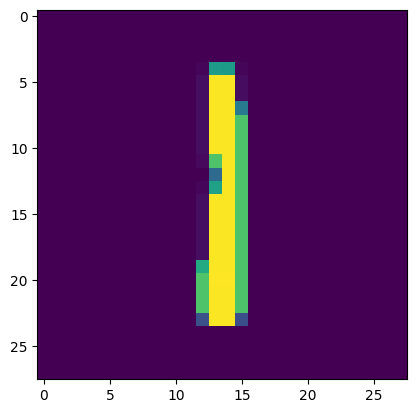

In [6]:
learningRate = 0.01

def backPropagate(predicted, expected):
    global W12, W23, W34, bias12, bias23, bias34
    # partial derivative wrt. neurons
    output_ = error_(predicted[3][1], expected)
    hidden2_ = np.dot(np.transpose(W34), (output_ * activation_(predicted[3][0])))
    hidden1_ = np.dot(np.transpose(W23), (hidden2_ * activation_(predicted[2][0])))
    # partial derivative wrt. weights & biases
    bias34_ = output_ * activation_(predicted[3][0])
    W34_ = np.tensordot(bias34_, predicted[2][1], axes=0)
    bias23_ = hidden2_ * activation_(predicted[2][0])
    W23_ = np.tensordot(bias23_, predicted[1][1], axes=0)
    bias12_ = hidden1_ * activation_(predicted[1][0])
    W12_ = np.tensordot(bias12_, predicted[0], axes=0)
    # update
    bias12 -= learningRate * bias12_
    W12 -= learningRate * W12_
    bias23 -= learningRate * bias23_
    W23 -= learningRate * W23_
    bias34 -= learningRate * bias34_
    W34 -= learningRate * W34_

plt.imshow(image[2].reshape(28, 28))
print("prediction before: ", predict(image[2])[3][1])
backPropagate(predict(image[2]), onehot(label[2]))
print("prediction after: ", predict(image[2])[3][1])

In [7]:
import time

def trainDNN(number):
    for i in range(number):
        index = np.random.randint(len(image))
        # train one image several times
        for j in range(5):
            backPropagate(predict(image[index]), onehot(label[index]))

time1 = time.time()
trainDNN(100000)
time2 = time.time()
print("Time taken to train the DNN: %.3f seconds" % (time2 - time1))

Time taken to train the DNN: 104.785 seconds


In [8]:
with open("test.csv") as testFile:
    test = list(csv.reader(testFile))
    testImage = [np.array(test[i], dtype=float) / 255 for i in range(1, len(test))]

array([2.01238685e-03, 3.65823355e-03, 9.97467122e-01, 1.03167502e-02,
       2.50566405e-03, 8.91197549e-05, 3.69310856e-03, 1.11374436e-03,
       9.04301390e-04, 6.82033943e-06])

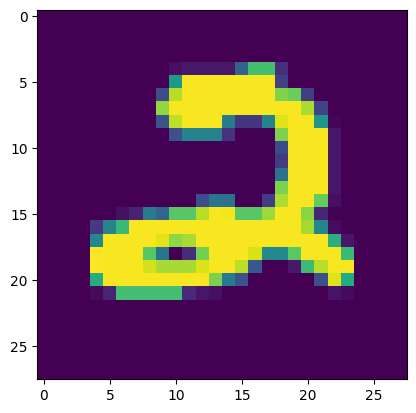

In [9]:
plt.imshow(testImage[0].reshape(28, 28))
predict(testImage[0])[3][1]

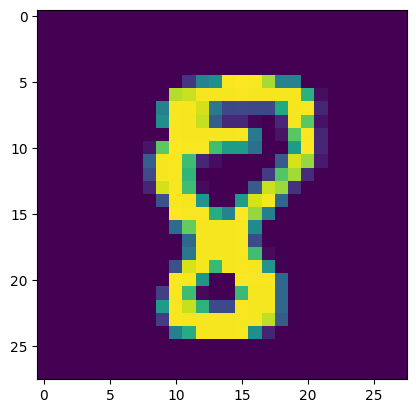

8


 c


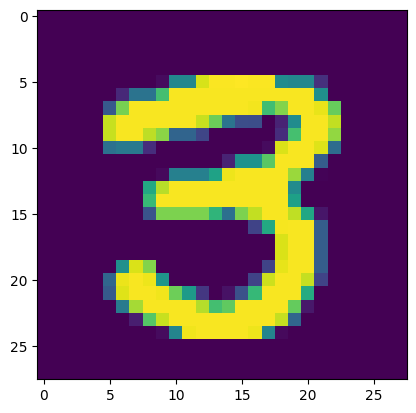

3


 c


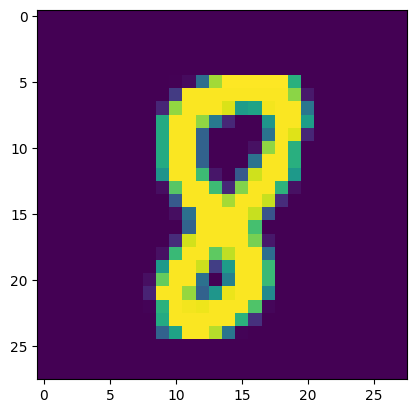

8


 c


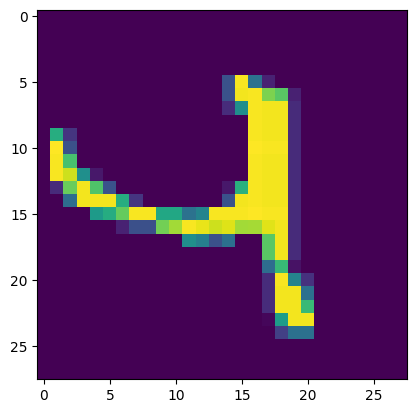

4


 c


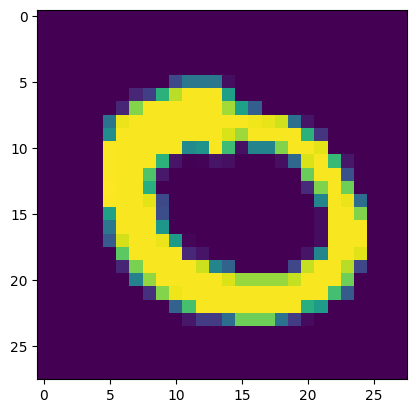

0


 c


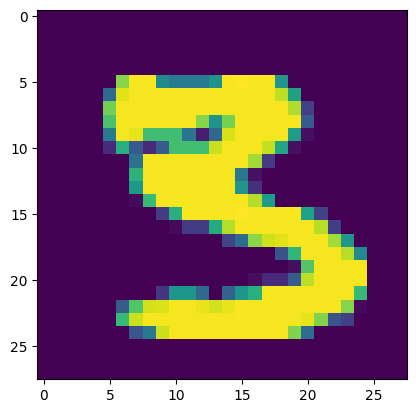

3


 c


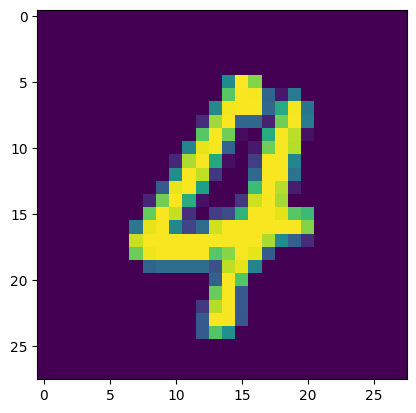

4


 c


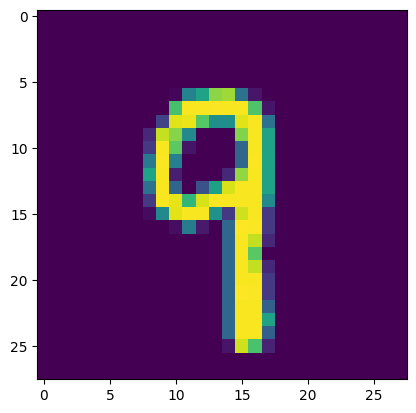

9


 c


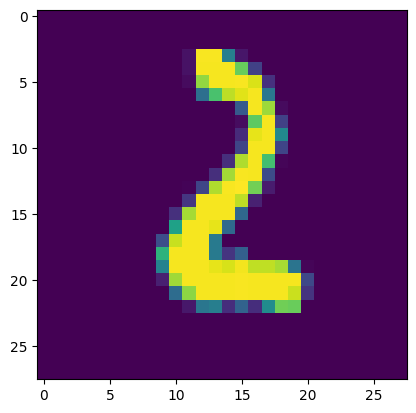

2


 c


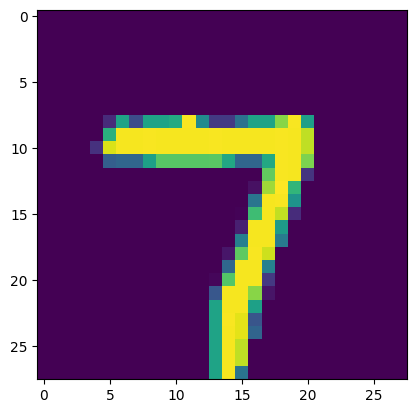

7


 c


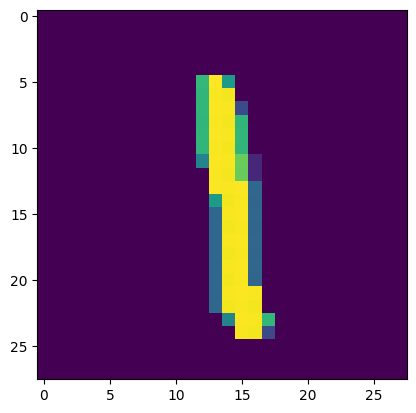

1


 c


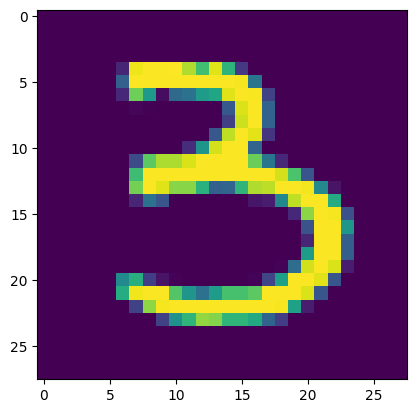

3


 c


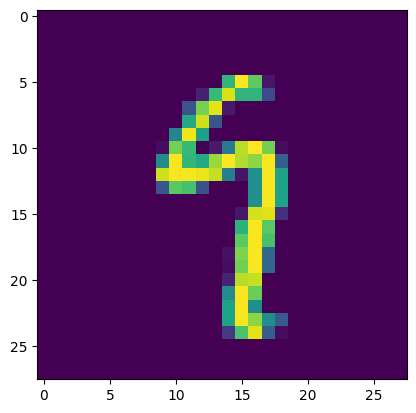

9


 c


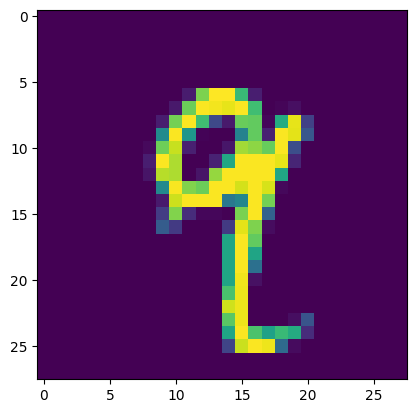

9


 c


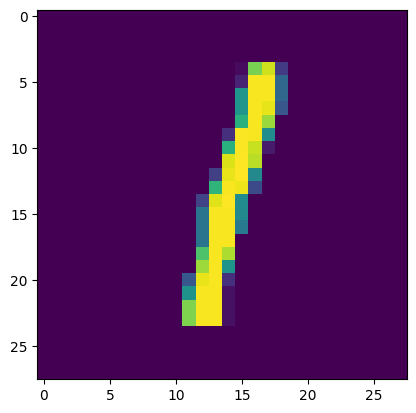

1


 c


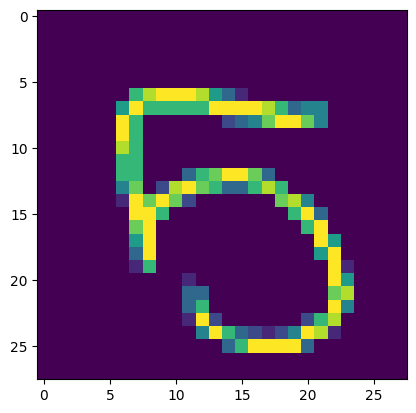

5


 c


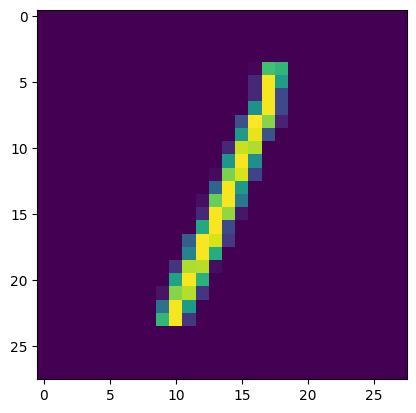

1


 c


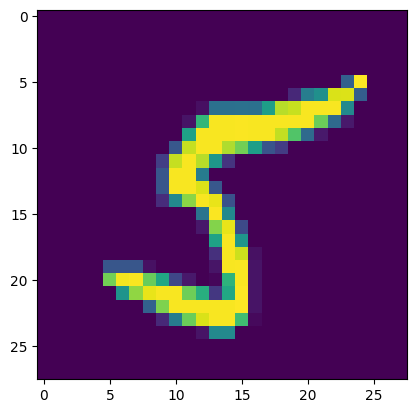

5


 c


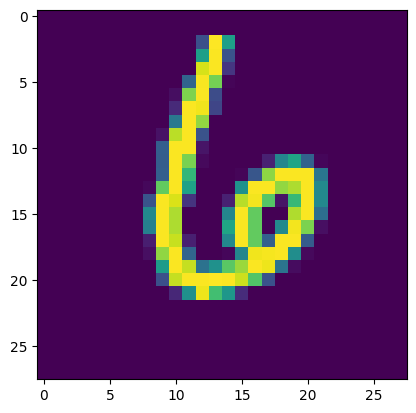

6


 c


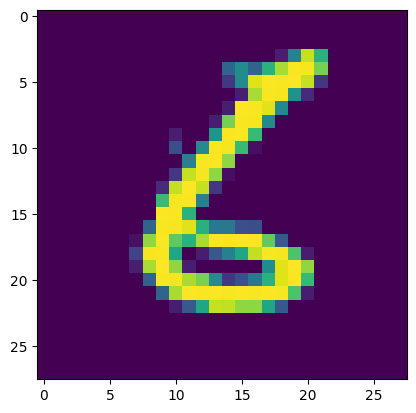

6


 c


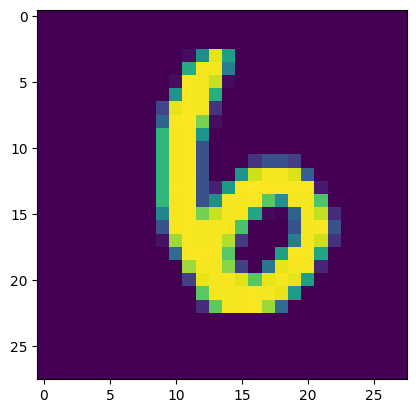

6


 c


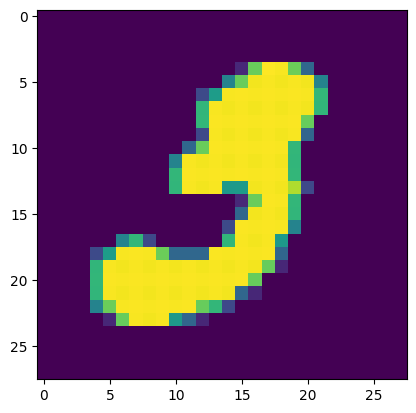

3


 c


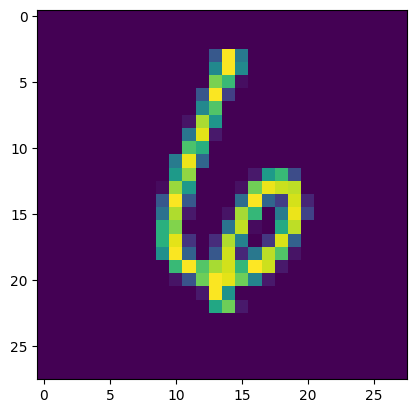

6


 c


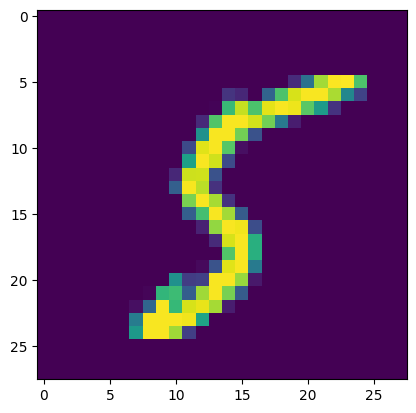

5


 c


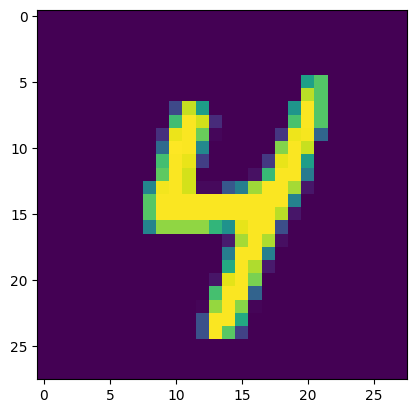

4


 c


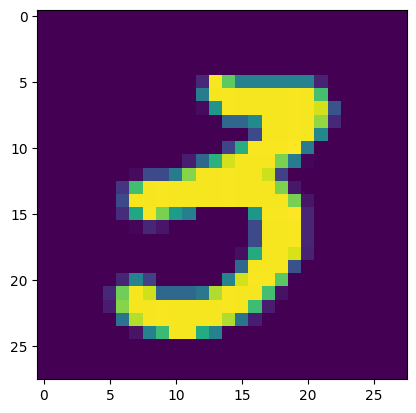

3


 c


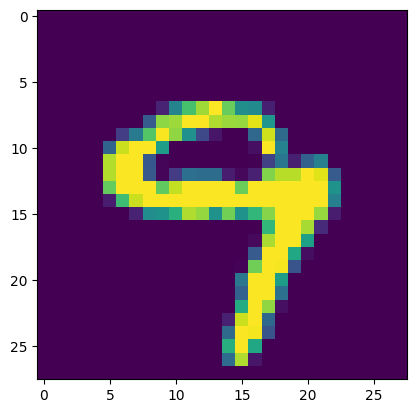

4


 w


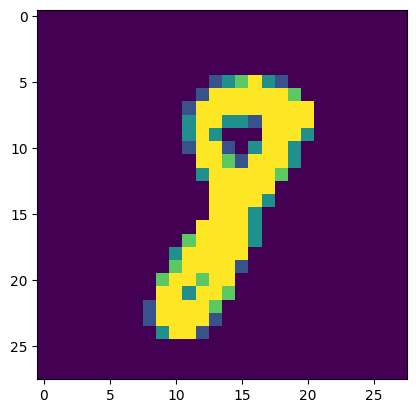

1


 w


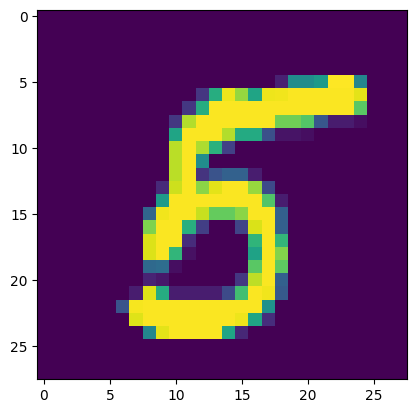

5


 c


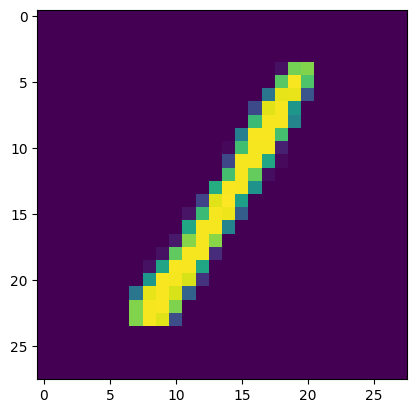

1


 c


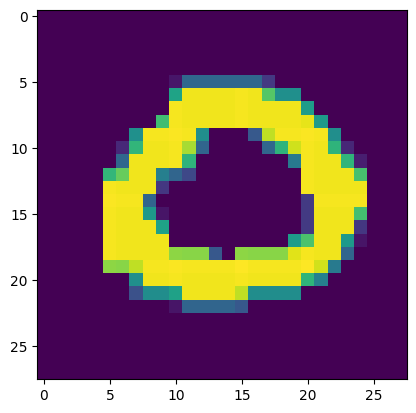

0


 c


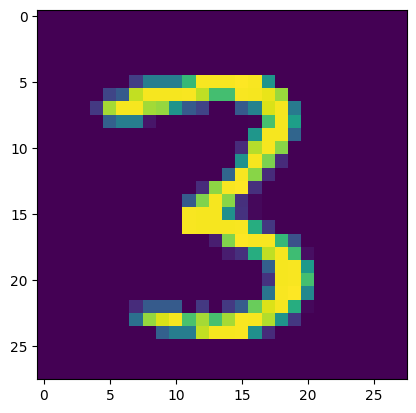

3


 c


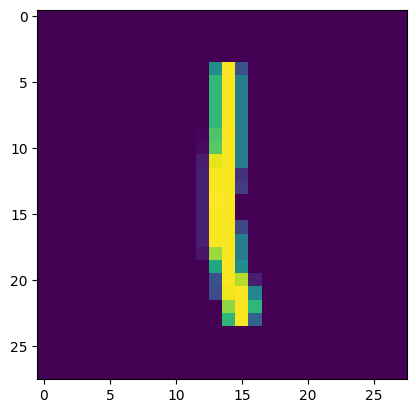

1


 c


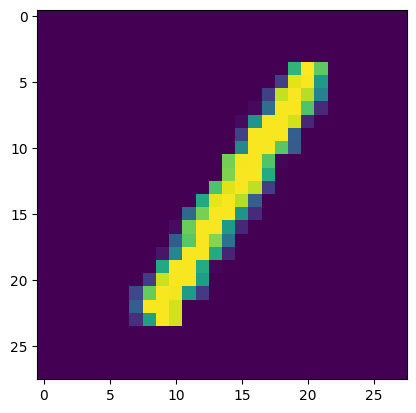

1


 c


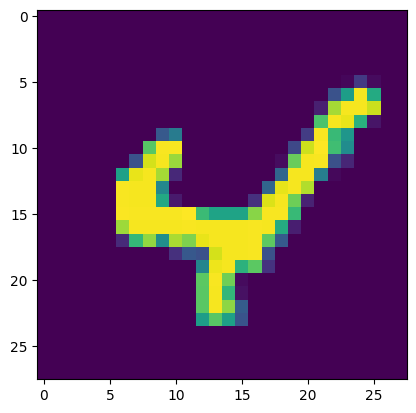

4


 c


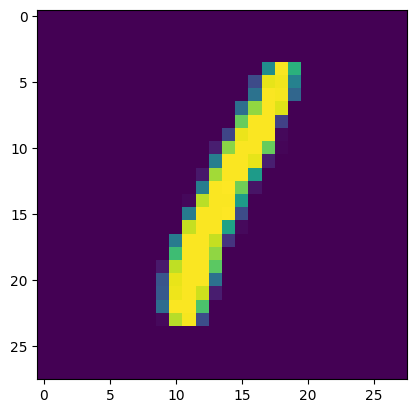

1


 c


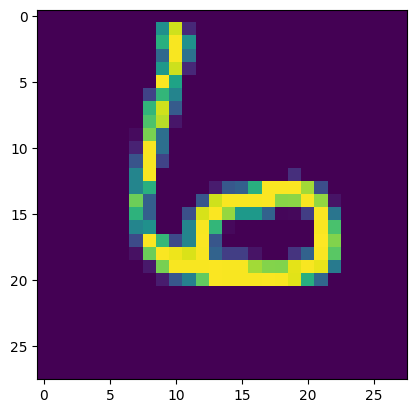

6


 c


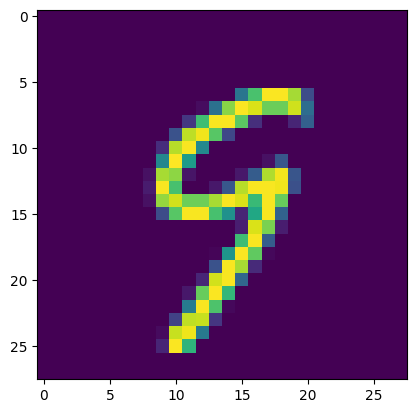

9


 c


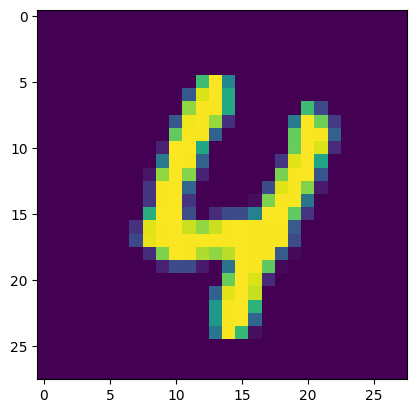

4


 q


total= 38 ; correct= 36


In [10]:
toNext = True
total = 0
correct = 0

while toNext:
    index = np.random.randint(len(testImage))
    plt.imshow(testImage[index].reshape(28, 28))
    plt.show()
    predicted = predict(testImage[index])[3][1]
    print(np.where(predicted == np.max(predicted))[0][0])
    result = input()
    if result == "q" or result == "Q" or result == "f" or result == "F":
        toNext = False
    elif result == "r" or result == "c" or result == "R" or result == "C" or result == "t" or result == "T":
        correct += 1
        total += 1
    else:
        total += 1
    
print("total=", total, "; correct=", correct)